# Load packages

In [1]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.
C:\Users\18202\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\18202\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\18202\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\18202\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

# Preprocessing

In [13]:
df = pd.read_excel("E:/weka/Dataset/Real estate valuation data set.xlsx")
df = pd.DataFrame(df)
df = df.drop(['No'],axis=1)
df = np.array(df)
splitted_array = np.split(df,[-1],axis=1)
data = pd.DataFrame(splitted_array[0])
label = pd.DataFrame(splitted_array[1])
scaler = preprocessing.MinMaxScaler()
data = scaler.fit_transform(data)
data = pd.DataFrame(data)

# Dividing dataset into training set and testing set

In [14]:
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.25, random_state=0)

# MLP

In [31]:
model = Sequential()  
model.add(Dense(units = 8,use_bias = True,activation='relu',input_shape=(X_train.shape[1],) ))
model.add(Dense(units = 16,use_bias = True,activation='relu'))
model.add(Dense(units = 32,use_bias = True,activation='relu'))
model.add(Dense(units = 16,use_bias = True,activation='relu'))
model.add(Dense(units = 8,use_bias = True,activation='relu'))
model.add(Dense(units = 1,activation='linear'))
print(model.summary())
model.compile(loss='mse',optimizer='nadam')
history = model.fit(X_train, y_train,epochs=60,batch_size=68)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 8)                 56        
_________________________________________________________________
dense_20 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_21 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_22 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_23 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 9         
Total params: 1,417
Trainable params: 1,417
Non-trainable params: 0
_________________________________________________________________
None
Epo

# Graph for convergence loss

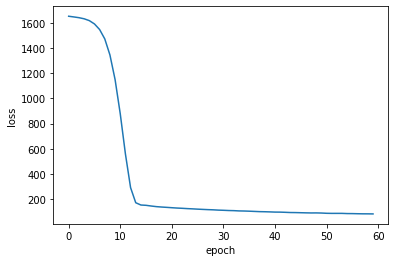

In [32]:
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

# MAE for training set

In [33]:
Y_pre = model.predict(X_train)
mean_absolute_error(y_train, Y_pre)

6.292974305921986

# MAE for testing set

In [34]:
y_pre = model.predict(X_test)
mean_absolute_error(y_test, y_pre)

6.438686084747314

# MSE for training set

In [35]:
mean_squared_error(y_train, Y_pre)

81.23212521501642

# MSE for testing set

In [36]:
mean_squared_error(y_test, y_pre)

75.94032426218058

In [37]:
from sklearn import metrics
metrics.r2_score(y_test,y_pre)

0.5479713522764791

In [38]:
metrics.mean_squared_log_error(y_test,y_pre)

0.0658166507066131